In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline


###   merging the 12th months of data

In [2]:
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_February_2019.csv")

files = [file for file in os.listdir("C:\\Users\\sanja\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("C:\\Users\\sanja\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\" +file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("C:\\Users\\sanja\\OneDrive\\Pictures\\all_data.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sanja\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_February_2019.csv'

In [6]:
files = [file for file in os.listdir("C:\\Users\\sanja\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data")]

files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

## read and update dataframe

In [2]:
all_data = pd.read_csv("C:\\Users\\sanja\\OneDrive\\Pictures\\all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## clean up data

## drop rows of nan

In [3]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## finding "Or" and delet it

In [4]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]


## convert column to correct datatype

In [5]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) #int
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"]) #float



## adding a month column

In [6]:
all_data["month"] = all_data["Order Date"].str[0:2]
all_data.head()

all_data["month"] = all_data["month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## adding sales column

In [7]:
all_data["sales"] = all_data["Quantity Ordered"] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## add a city column

In [28]:
def city(address):
    return address.split(',')[1]

def state(address):
    return address.split(',')[2].split(' ')[1]


all_data["city"] = all_data["Purchase Address"].apply(lambda x: f"{city(x)} ({state(x)})")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


## QUESTION : what was the best month for sales? how much earned that month?

In [11]:
result = all_data.groupby("month").sum()
result

C:\Users\sanja\AppData\Local\Temp\ipykernel_6772\1620184943.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = all_data.groupby("month").sum()


,Quantity Ordered,Price Each,sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


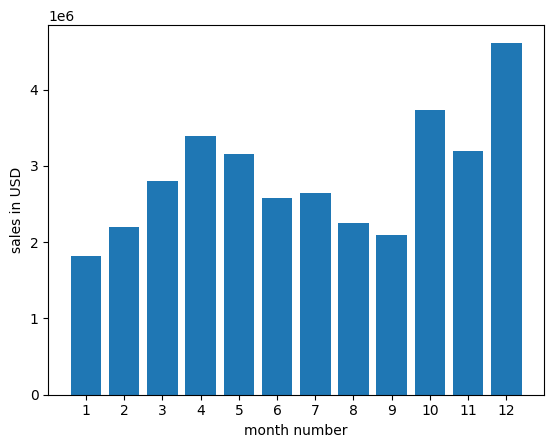

In [18]:
months = range(1,13)
plt.bar(months, result["sales"])
plt.xticks(months)
plt.xlabel("month number")
plt.ylabel("sales in USD")
plt.show()

## QUESTION :what city had the hightest number of sales?

In [30]:
result1 = all_data.groupby("city").sum()
result1

C:\Users\sanja\AppData\Local\Temp\ipykernel_6772\828828766.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result1 = all_data.groupby("city").sum()


,Quantity Ordered,Price Each,month,sales
city,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


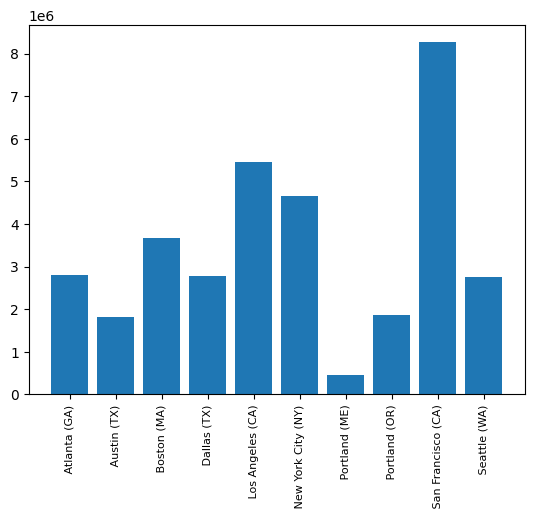

In [53]:
cities = [city for city, df in all_data.groupby('city')]

plt.bar(cities, result1["sales"])
plt.xticks(cities, rotation='vertical', size=8 )
plt.show()

## QUESTION :what time shoud we display advertisment to maximize likelihood of cutomer's buying product?

In [54]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [55]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [58]:
all_data['hour'] = all_data['Order Date'].dt.hour
all_data['minute'] =  all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


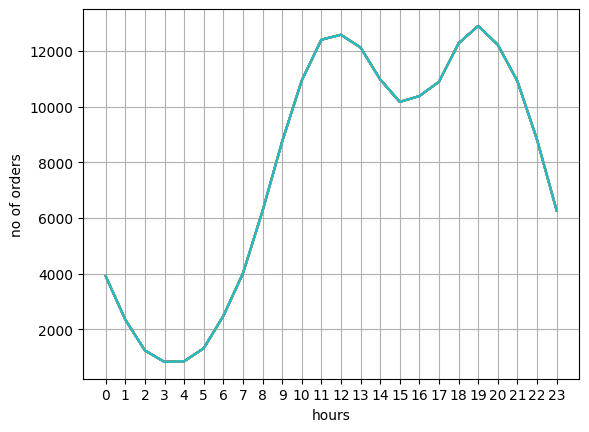

In [63]:
hours = [hour for hour, df in all_data.groupby('hour')]

all_data.groupby(all_data['hour']).count()

plt.plot(hours, all_data.groupby(all_data['hour']).count())
plt.xticks(hours)
plt.xlabel('hours')
plt.ylabel('no of orders')
plt.grid()
plt.show()

## QUESTION :what products  are most often sold together?

In [69]:
df = all_data[all_data['Order ID'].duplicated(keep= False)]

df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'grouped']].drop_duplicates()

df.head()

C:\Users\sanja\AppData\Local\Temp\ipykernel_6772\1556577655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [70]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## QUESTION :what product sold the most? why do you think it sold the most?

In [71]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


C:\Users\sanja\AppData\Local\Temp\ipykernel_6772\2926684299.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_order = product_data.sum()['Quantity Ordered']


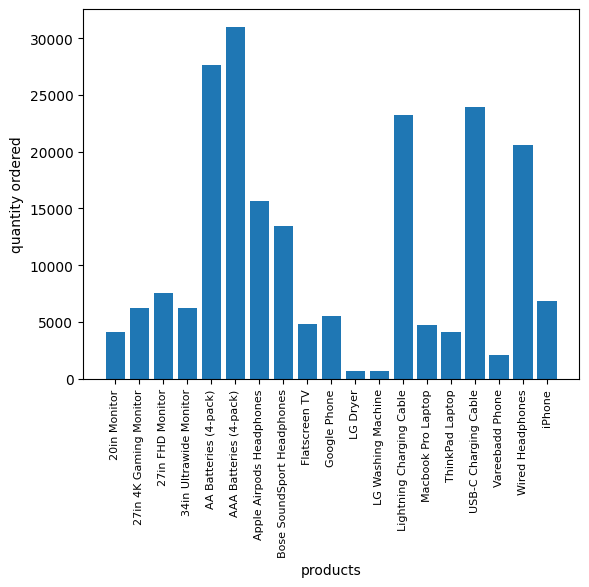

In [79]:
product_data = all_data.groupby('Product')

quantity_order = product_data.sum()['Quantity Ordered']

products = [product for product,df in product_data]

plt.bar(products, quantity_order)
plt.xlabel("products")
plt.ylabel("quantity ordered")
plt.xticks(products, rotation = 'vertical' , size = 8)
plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_6772\669625992.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby("Product").mean()["Price Each"]
C:\Users\sanja\AppData\Local\Temp\ipykernel_6772\669625992.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size=8)


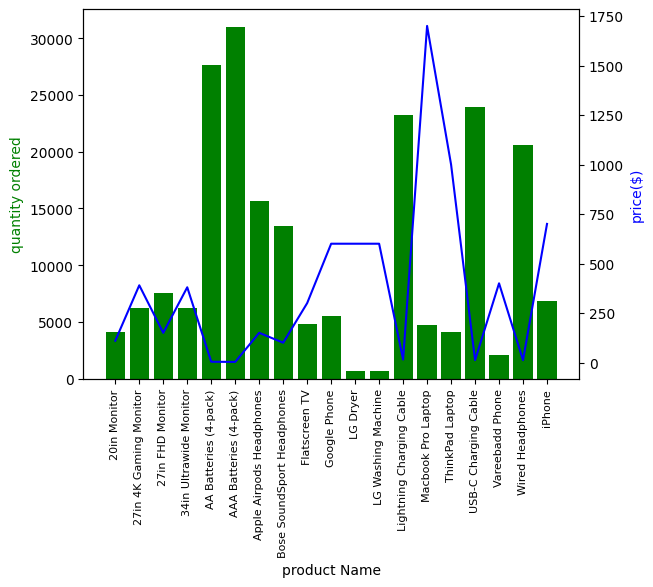

In [83]:
prices = all_data.groupby("Product").mean()["Price Each"]

ax1 = plt.subplot()

ax2 = ax1.twinx()
ax1.bar(products, quantity_order, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('product Name')
ax1.set_ylabel('quantity ordered', color ='g')
ax2.set_ylabel('price($)', color ='b')
ax1.set_xticklabels(products, rotation = 'vertical', size=8)
plt.show()